<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [45]:
!pip install pandas

In [46]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [47]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-18 14:21:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.2MB/s    in 2.6s    

2025-03-18 14:21:03 (59.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [49]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [50]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



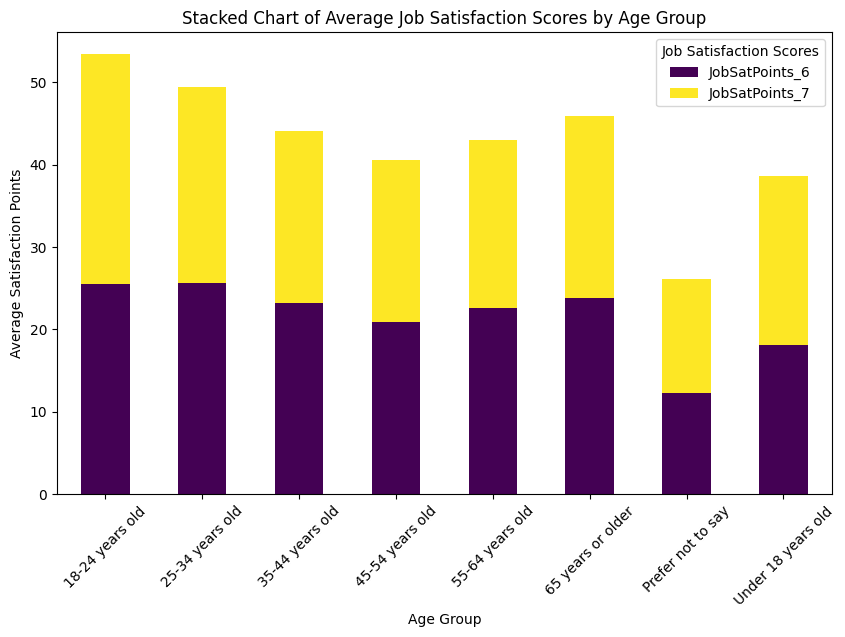

In [51]:
# Drop missing values for JobSatPoints_6 and JobSatPoints_7
df_cleaned = df.dropna(subset=["JobSatPoints_6", "JobSatPoints_7"])

# Group by Age Group and calculate the mean Job Satisfaction Scores
age_group_satisfaction = df_cleaned.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].mean()

# Plot stacked bar chart
age_group_satisfaction.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Chart title and labels
plt.title("Stacked Chart of Average Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Satisfaction Points")
plt.legend(title="Job Satisfaction Scores")
plt.xticks(rotation=45)

# Show plot
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


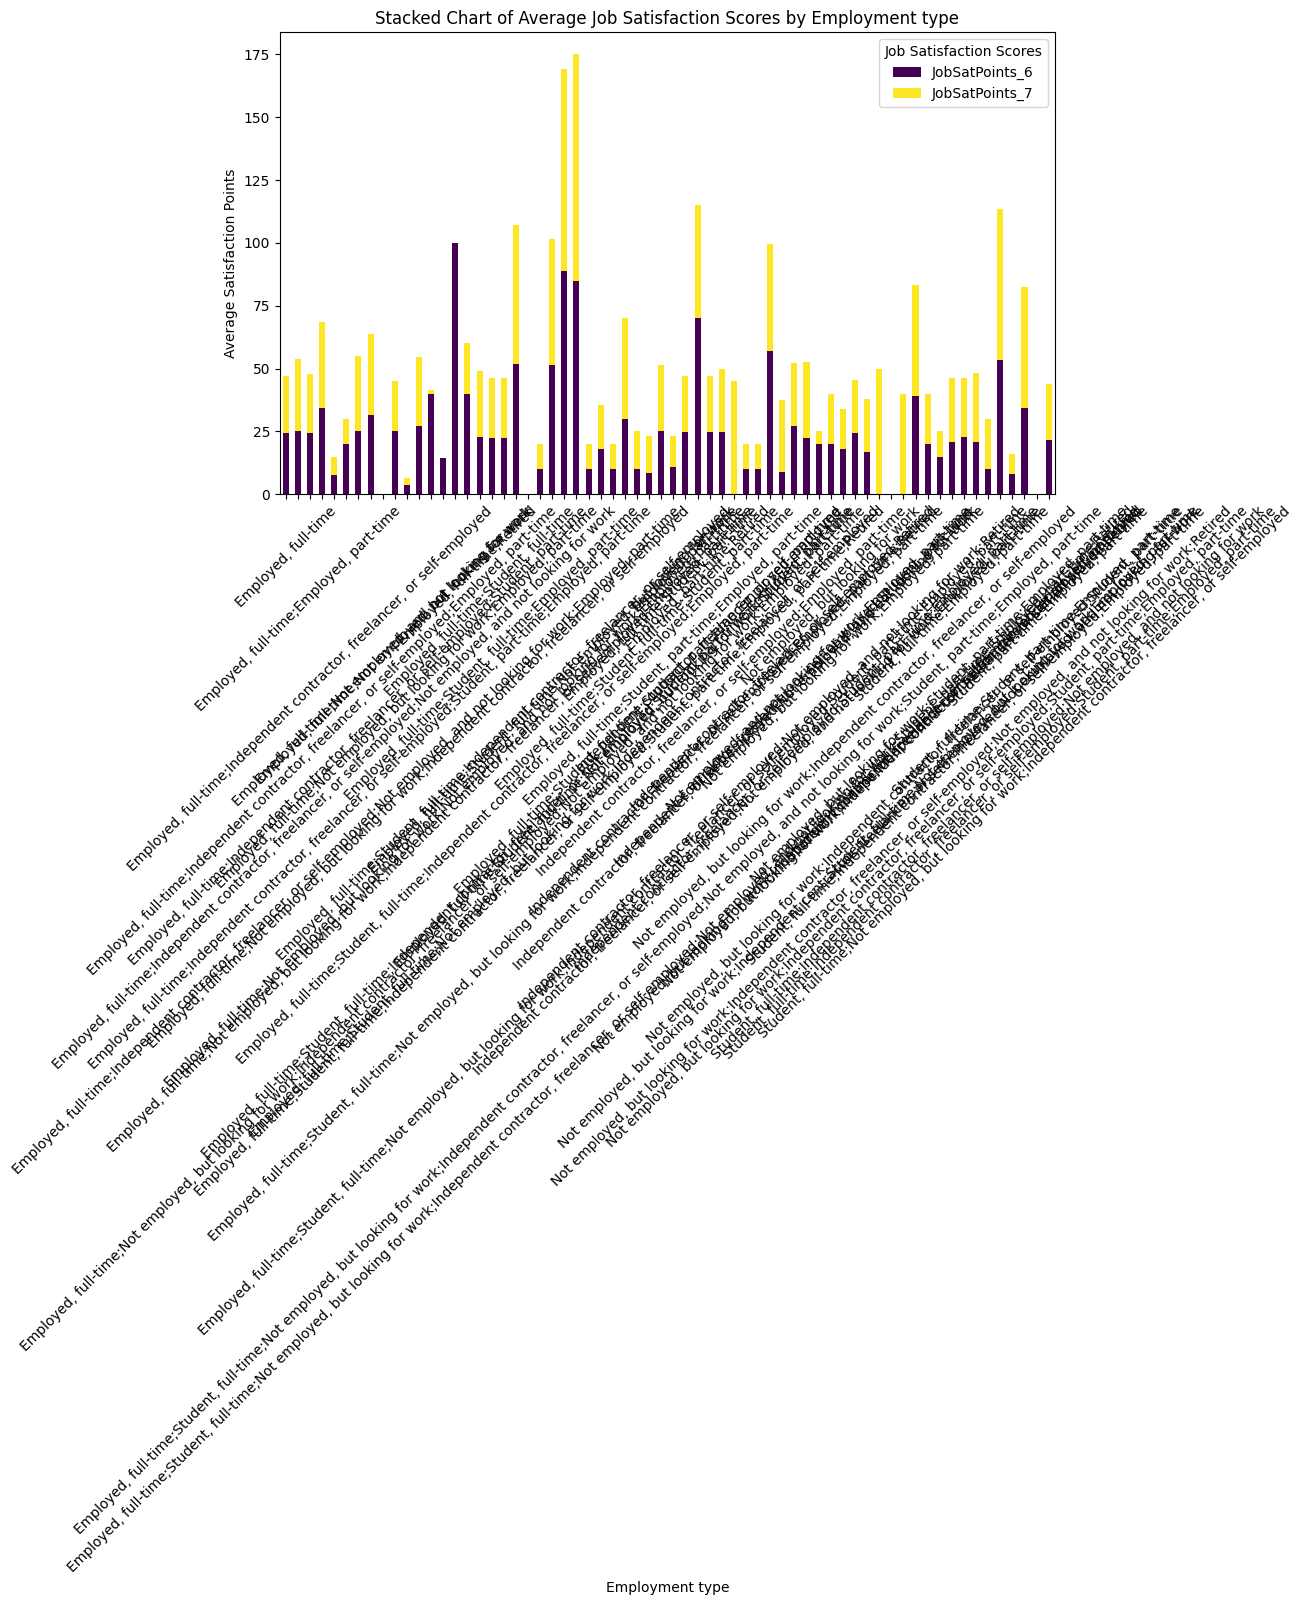

In [52]:
# Drop missing values for JobSatPoints_6 and JobSatPoints_7
df_cleaned = df.dropna(subset=["JobSatPoints_6", "JobSatPoints_7"])

# Group by Age Group and calculate the mean Job Satisfaction Scores
age_group_satisfaction = df_cleaned.groupby("Employment")[["JobSatPoints_6", "JobSatPoints_7"]].mean()

# Plot stacked bar chart
age_group_satisfaction.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Chart title and labels
plt.title("Stacked Chart of Average Job Satisfaction Scores by Employment type")
plt.xlabel("Employment type")
plt.ylabel("Average Satisfaction Points")
plt.legend(title="Job Satisfaction Scores")
plt.xticks(rotation=45)

# Show plot
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [57]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

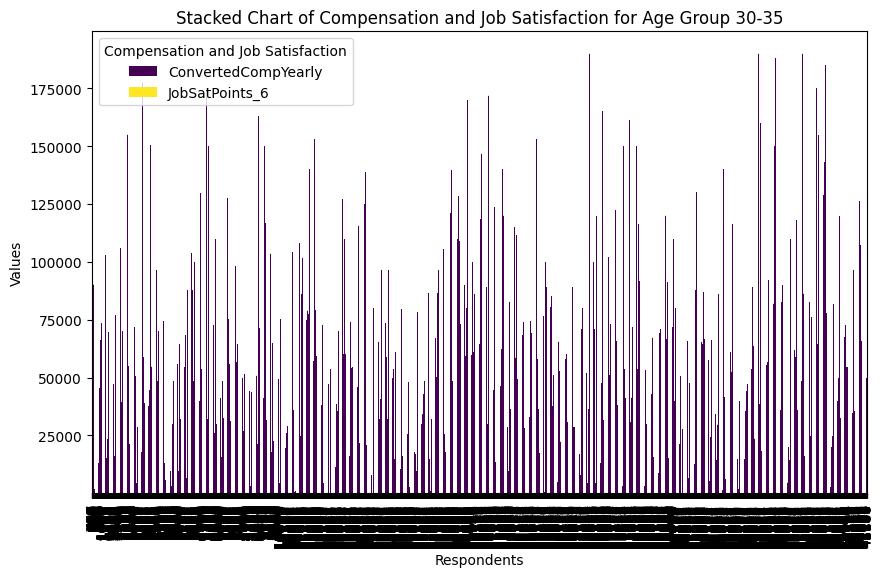

In [58]:
# Filter for respondents aged 30-35
df_age_30_35 = df[(df["Age"] == '25-34 years old')]

# Drop missing values for the relevant columns
df_age_30_35_cleaned = df_age_30_35.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

#Removing outliers
df_age_30_35_well_cleaned = remove_outliers_iqr(df_age_30_35_cleaned,"ConvertedCompYearly")

# Plot a stacked bar chart for ConvertedCompYearly and JobSatPoints_6
df_age_30_35_well_cleaned[["ConvertedCompYearly", "JobSatPoints_6"]].plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Chart title and labels
plt.title("Stacked Chart of Compensation and Job Satisfaction for Age Group 30-35")
plt.xlabel("Respondents")
plt.ylabel("Values")
plt.legend(title="Compensation and Job Satisfaction")

# Show plot
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


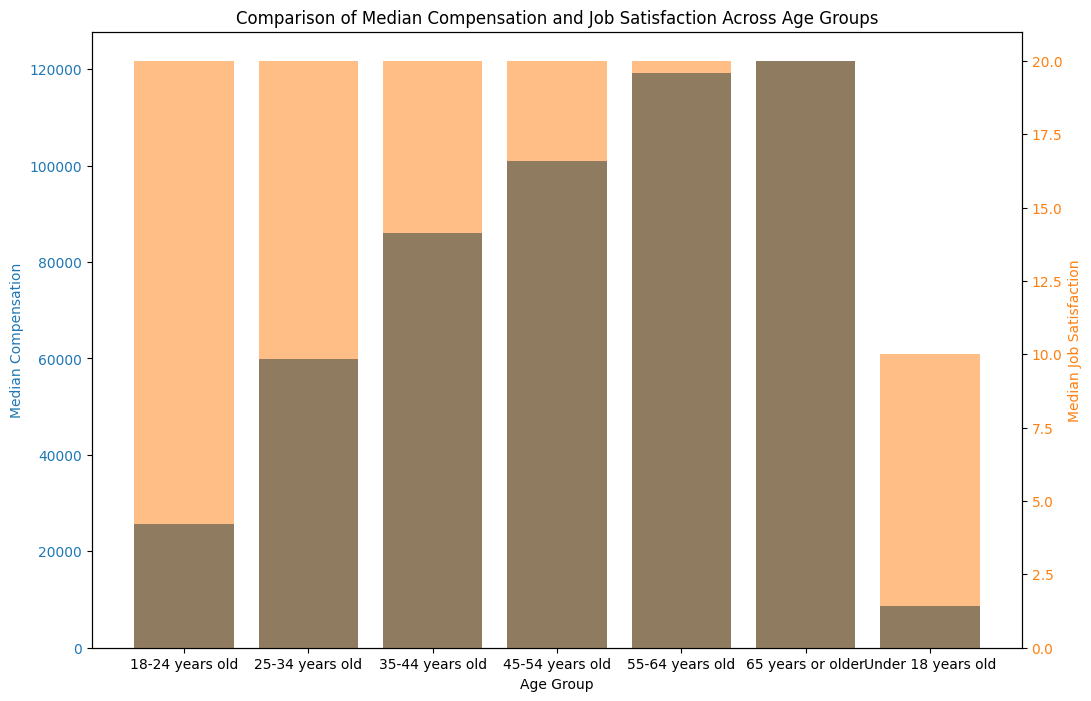

In [55]:
# Drop missing values for the relevant columns
df_cleaned = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

df_cleaned = df_cleaned[df_cleaned['Age'] != 'Prefer not to say']

# Group by Age and calculate the median for ConvertedCompYearly and JobSatPoints_6
age_group_median = df_cleaned.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()


#Removing outliers
age_group_median_cleaned = remove_outliers_iqr(age_group_median,"ConvertedCompYearly")

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the median compensation on the first y-axis (left side)
color = 'tab:blue'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Median Compensation', color=color)
ax1.bar(age_group_median_cleaned.index, age_group_median_cleaned['ConvertedCompYearly'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the median job satisfaction on the right side
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Median Job Satisfaction', color=color)
ax2.bar(age_group_median_cleaned.index, age_group_median_cleaned['JobSatPoints_6'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title("Comparison of Median Compensation and Job Satisfaction Across Age Groups")
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


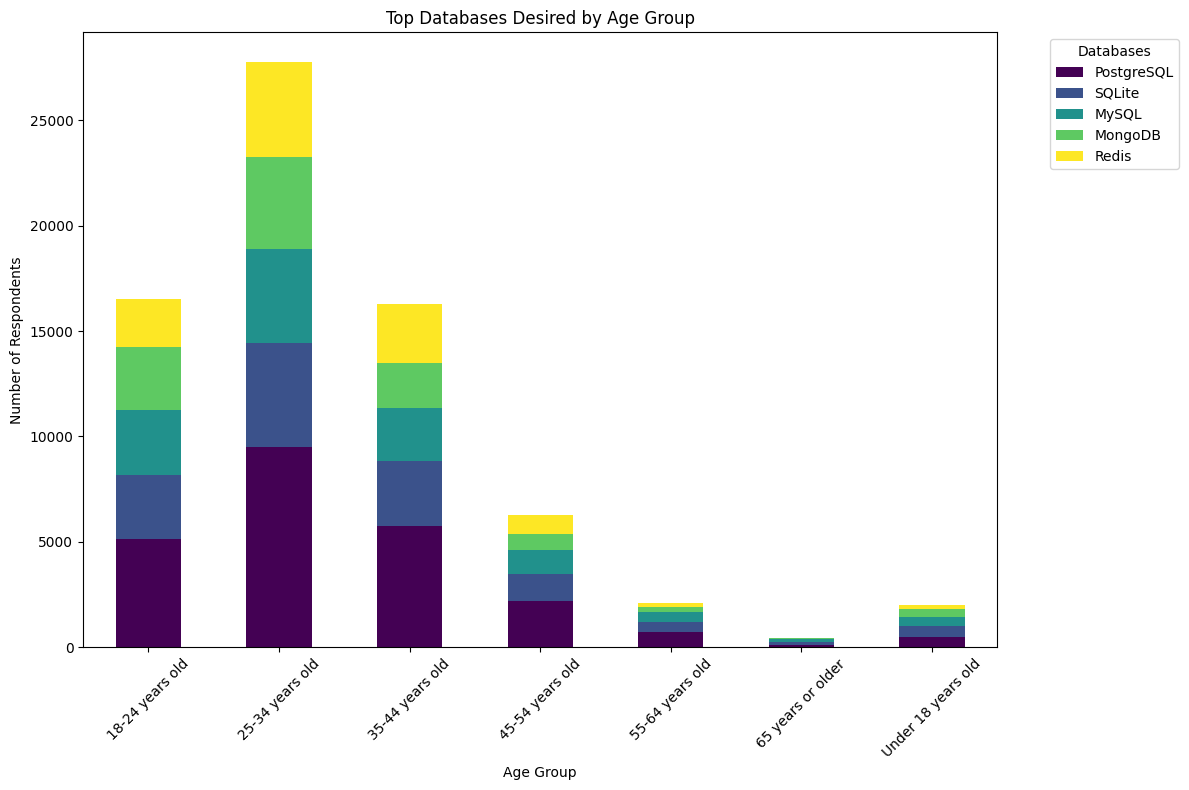

In [56]:
# Drop missing values for the relevant columns (Age and DatabaseWantToWorkWith)
df_cleaned = df.dropna(subset=["Age", "DatabaseWantToWorkWith"])

#{Removing Prefer not to say categorie
df_cleaned = df_cleaned[df_cleaned['Age'] != 'Prefer not to say']

# Split the 'DatabaseWantToWorkWith' column by comma and explode it to get each database in a separate row
df_cleaned['DatabaseWantToWorkWith'] = df_cleaned['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_cleaned.explode('DatabaseWantToWorkWith')

# Remove extra spaces from database names
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

# Group by Age and Database, and count the occurrences
database_counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Sort to get the top N databases
top_databases = database_counts.sum(axis=0).sort_values(ascending=False).head(5).index

# Filter the top databases from the database counts
top_database_counts = database_counts[top_databases]

# Plot a stacked bar chart for top databases
top_database_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Chart title and labels
plt.title("Top Databases Desired by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)

# Show plot
plt.legend(title="Databases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_741/3699040935.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


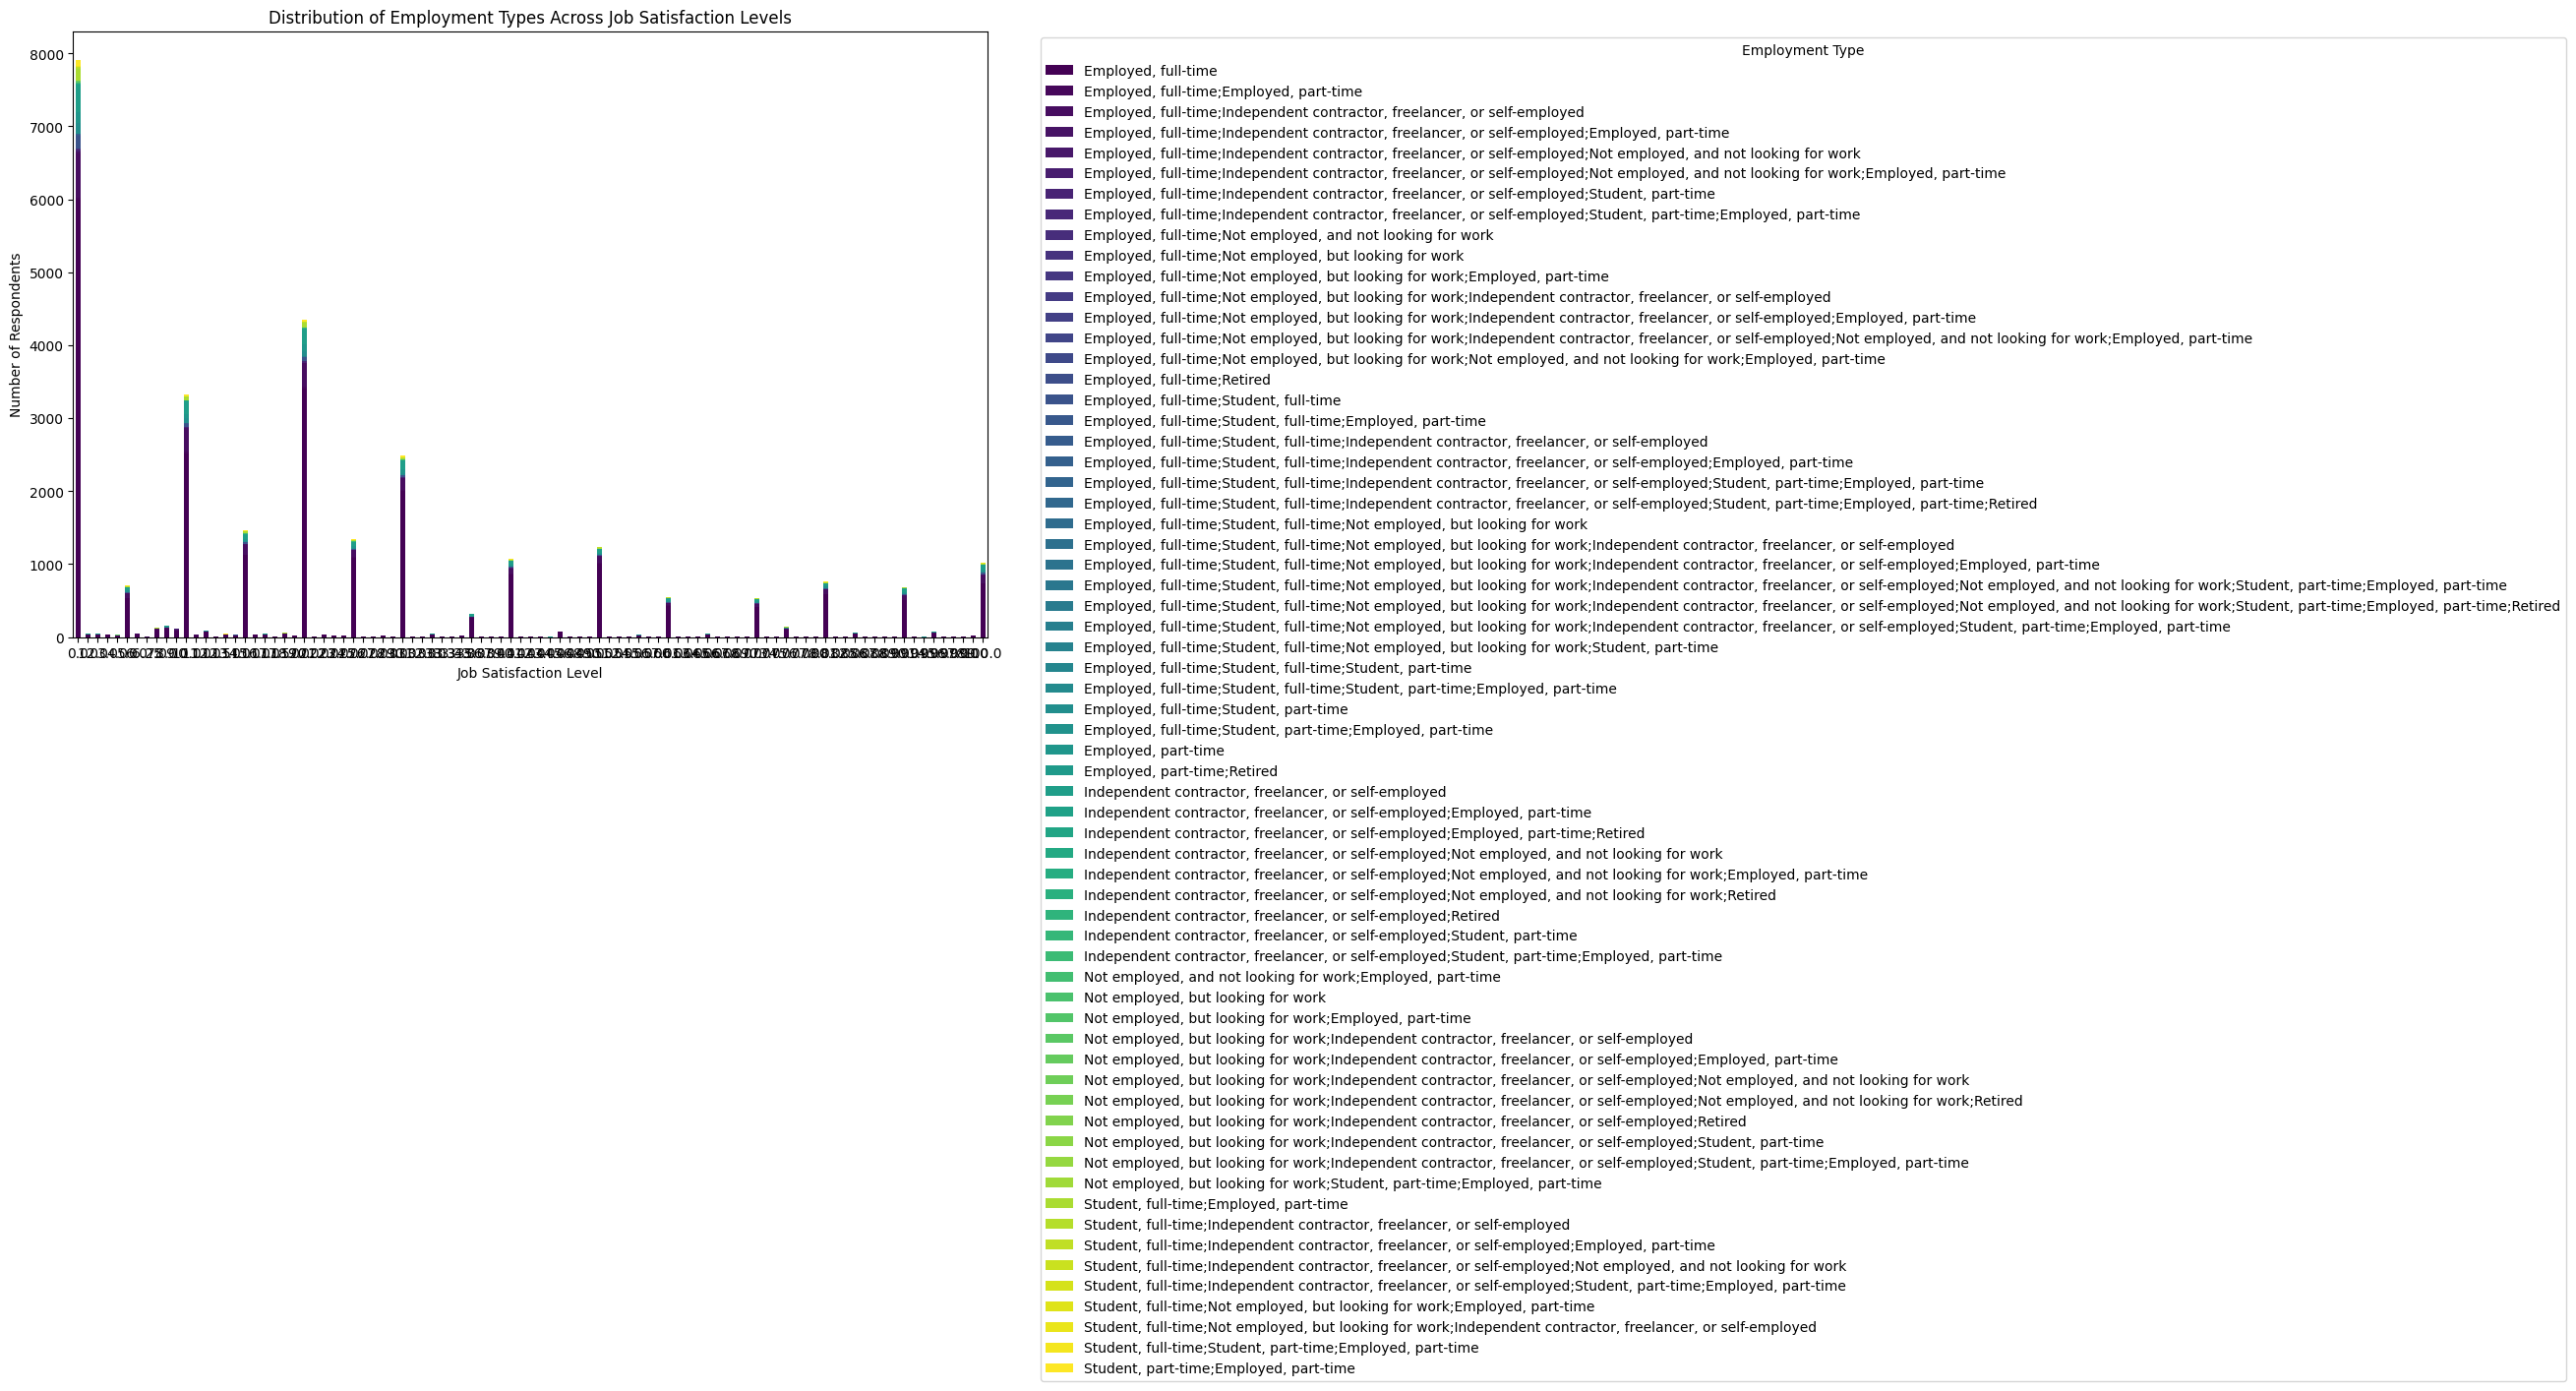

In [59]:
# Drop missing values for the relevant columns (JobSatPoints_6 and EmploymentType)
df_cleaned = df.dropna(subset=["JobSatPoints_6", "Employment"])

# Group by JobSatPoints_6 (Job Satisfaction level) and EmploymentType, and count occurrences
employment_distribution = df_cleaned.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Plot a stacked bar chart for employment types across job satisfaction levels
employment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Chart title and labels
plt.title("Distribution of Employment Types Across Job Satisfaction Levels")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)

# Show plot
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_741/3828030907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LanguageAdmired'] = df_cleaned['LanguageAdmired'].str.split(';')


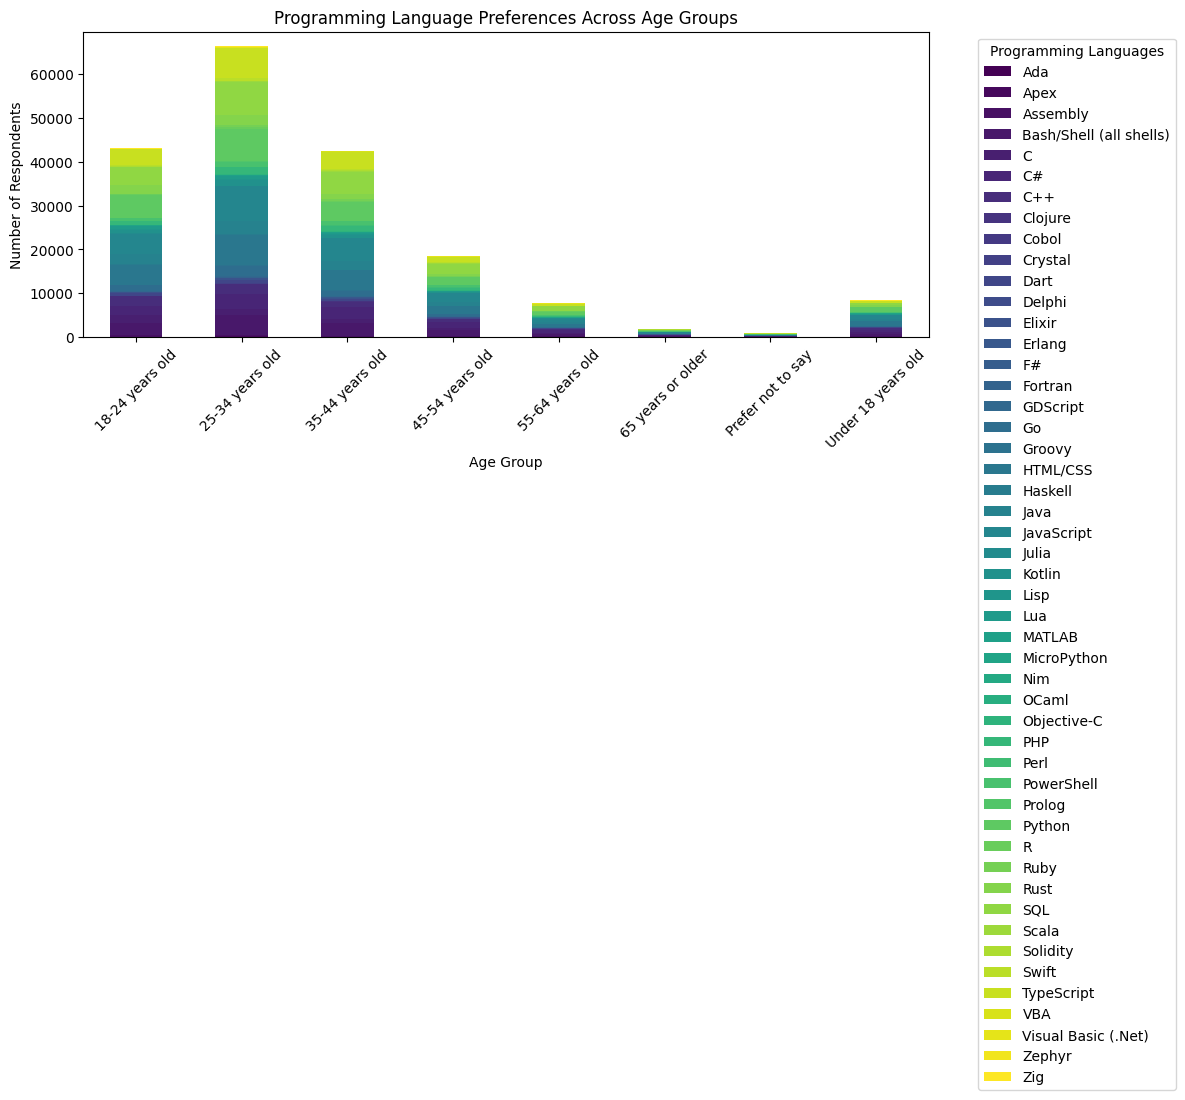

In [60]:
# Drop missing values for the relevant columns (Age and LanguageAdmired)
df_cleaned = df.dropna(subset=["Age", "LanguageAdmired"])

# Split the 'LanguageAdmired' column by comma and explode it to get each language in a separate row
df_cleaned['LanguageAdmired'] = df_cleaned['LanguageAdmired'].str.split(';')
df_exploded = df_cleaned.explode('LanguageAdmired')

# Remove extra spaces from language names
df_exploded['LanguageAdmired'] = df_exploded['LanguageAdmired'].str.strip()

# Group by Age and LanguageAdmired, and count the occurrences
language_counts = df_exploded.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Plot a stacked bar chart for language preferences across age groups
language_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Chart title and labels
plt.title("Programming Language Preferences Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)

# Show plot
plt.legend(title="Programming Languages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
